### Tarea
Juntense en grupos. Tienen una semana para entregar esta tarea. Para ambos datasets example_1.txt y example_2.txt. Cada grupo deberá cargar el edge list que corresponde y hacer lo siguiente:

*   Pregunta 1: Calcula todas las medidas básicas que se muestran arriba. Comente ¿Qué se puede sospechar acerca de la distribución de grados de la red solo en función de la media y los grados extremos?

*   Pregunta 2: Graficar la distribución del grado en escala log-log. También graficarlo en escala lineal. Comente cómo encaja esto con el análisis de la pregunta 1.

*   Pregunta 3: Dibuje la red utilizando los dos algoritmos de diseño que se muestran arriba. ¿Cómo se refljan en la apariencia de la red los hallazgos de las preguntas 1 y 2?

Nota: Recuerden que SU interpretación de los resultados es lo más importante.

### Integrantes
- Sebastián Gacitúa
- Bastián Guzmán
- Jose Zamora
- Leandro Aroca
- Matthias Clein

### Librerías


In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## example_1

### Lectura del archivo

In [2]:
G = nx.read_edgelist('../data/example_1.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

### Pregunta 1
Calcula todas las medidas básicas. Comente ¿Qué se puede sospechar acerca de la distribución de grados de la red solo en función de la media y los grados extremos?

Obtenemos la cantidad de nodos, enlaces y grados.

In [3]:
N = len(G)
L = G.size()
degrees = list(dict(G.degree()).values())
kmin = min(degrees)
kmax = max(degrees)

Resumen de resultados:

In [4]:
print("Número de nodos: ", N)
print("Número de enlaces: ", L)
print('-------')
print("Grado promedio: ", 2*L/N)
print("Grado promedio (alternativa de cálculo)", np.mean(degrees))
print('-------')
print("Grado mínimo: ", kmin)
print("Grado máximo: ", kmax)

Número de nodos:  1000
Número de enlaces:  2991
-------
Grado promedio:  5.982
Grado promedio (alternativa de cálculo) 5.982
-------
Grado mínimo:  3
Grado máximo:  98


Se puede sospechar que la distribución de los grados corresponde a una red libre de escala, esto se debe a que el grado promedio está muy alejado del grado mínimo y del grado máximo. Los modelos de escala libre representan un problema del mundo real.

### Pregunta 2
Graficar la distribución del grado en escala log-log. También graficarlo en escala lineal. Comente cómo encaja esto con el análisis de la pregunta 1.

Graficamos la distribución de grados en escala lineal.

In [14]:
# Entrega 20 bins linealmente espaceados entre kmin y kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histograma de la data en estos bines 
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

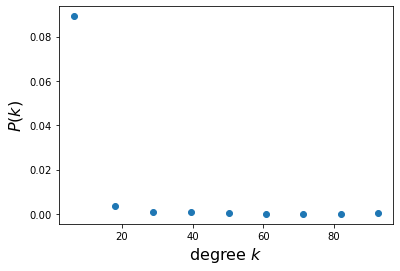

In [15]:
fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# Muestra la gráfica
plt.show()

Graficamos la distribución de grados en escala logarítmica.

In [7]:
# Generamos 10 bins espaciados logaritmicamente entre kmin y kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)

# histograma de la data para esos bines
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

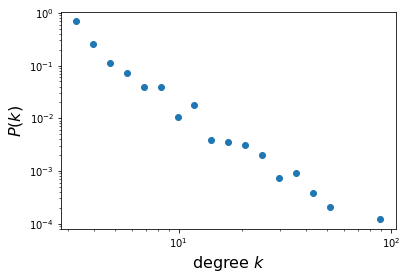

In [10]:
fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
plt.show()

Según la hipótesis establecida en la pregunta número 1, en donde se indica que la red corresponde a una red libre de escala, al momento de graficarlo en una escala logarítmica los ejes (log-log), forman una línea recta aproximada, por lo cual podemos decir que nuestra hipótesis se cumple, al igual que cuando se grafica la escala lineal, en este se forma una línea recta muy acentuada. 

### Pregunta 3
Dibuje la red utilizando los dos algoritmos de diseño que se muestran arriba. ¿Cómo se refljan en la apariencia de la red los hallazgos de las preguntas 1 y 2?

Graficamos la red utilizando las funciones *draw_spring* y *draw_circular*.

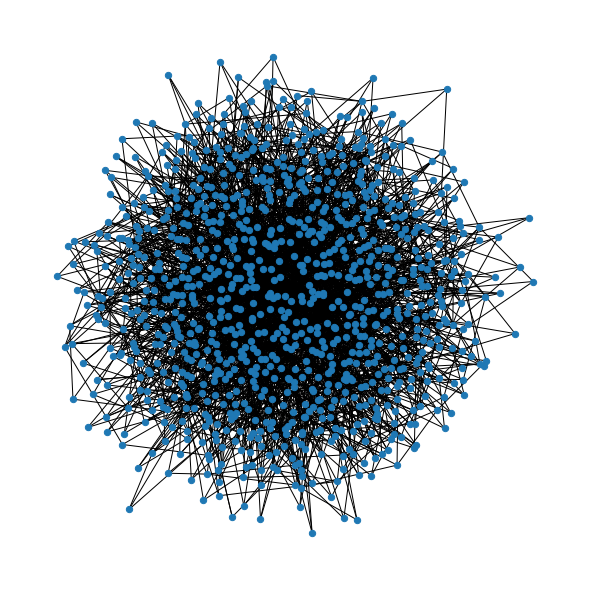

In [16]:
fig = plt.figure(figsize=(8,8))
nx.draw_spring(G, node_size=40)

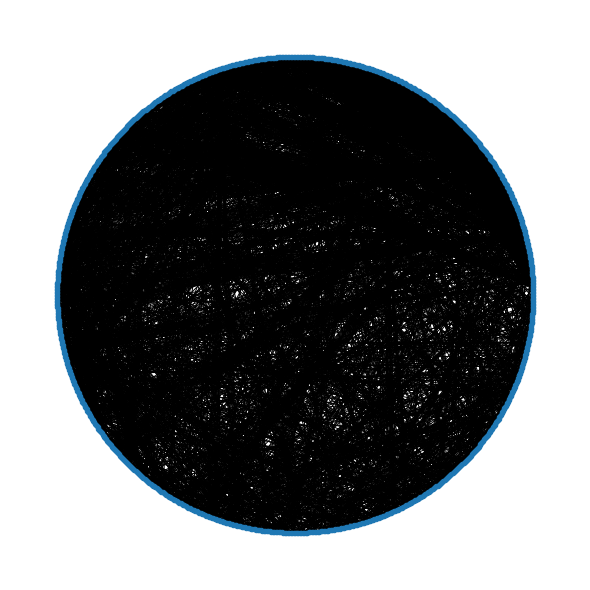

In [17]:
fig = plt.figure(figsize=(8,8))
nx.draw_circular(G, node_size=20)

## example_2

### Lectura del archivo

In [6]:
G2 = nx.read_edgelist('../data/example_2.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

### Pregunta 1
Calcula todas las medidas básicas. Comente ¿Qué se puede sospechar acerca de la distribución de grados de la red solo en función de la media y los grados extremos?

Obtenemos la cantidad de nodos, enlaces y grados.

In [9]:
N = len(G2)
L = G2.size()
degrees = list(dict(G2.degree()).values())
kmin = min(degrees)
kmax = max(degrees)

Resumen de resultados:

In [8]:
print("Número de nodos: ", N)
print("Número de enlaces: ", L)
print('-------')
print("Grado promedio: ", 2*L/N)
print("Grado promedio (alternativa de cálculo)", np.mean(degrees))
print('-------')
print("Grado mínimo: ", kmin)
print("Grado máximo: ", kmax)

Número de nodos:  197
Número de enlaces:  1651
-------
Grado promedio:  16.761421319796955
Grado promedio (alternativa de cálculo) 16.761421319796955
-------
Grado mínimo:  1
Grado máximo:  43


Se puede sospechar de la distribución de grados de la red, que esta corresponde a una distribución random (Aleatoria), tanto para A como para C, dado que el grado máximo como el grado mínimo se encuentran cerca del grado promedio. Los modelos random representan problemas del mundo pequeño, lo que corresponde a redes “pequeñas” pero altamente agrupadas localmente. 

### Pregunta 2
Graficar la distribución del grado en escala log-log. También graficarlo en escala lineal. Comente cómo encaja esto con el análisis de la pregunta 1.

Graficamos la distribución de grados en escala lineal.

In [12]:
# Entrega 20 bins linealmente espaceados entre kmin y kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histograma de la data en estos bines 
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

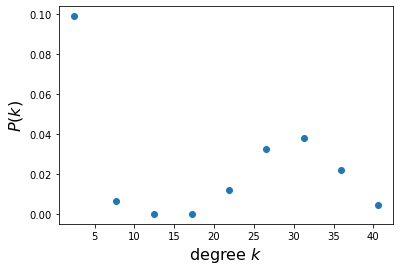

In [13]:
fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# Muestra la gráfica
plt.show()

Graficamos la distribución de grados en escala logarítmica.

In [14]:
# Generamos 10 bins espaciados logaritmicamente entre kmin y kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)

# histograma de la data para esos bines
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

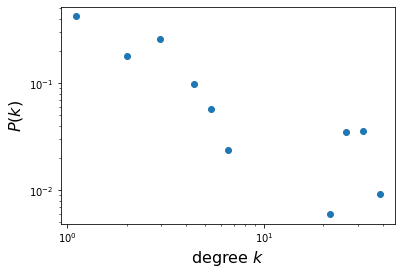

In [15]:
fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
plt.show()

### Pregunta 3
Dibuje la red utilizando los dos algoritmos de diseño que se muestran arriba. ¿Cómo se refljan en la apariencia de la red los hallazgos de las preguntas 1 y 2?

Graficamos la red utilizando las funciones *draw_spring* y *draw_circular*.

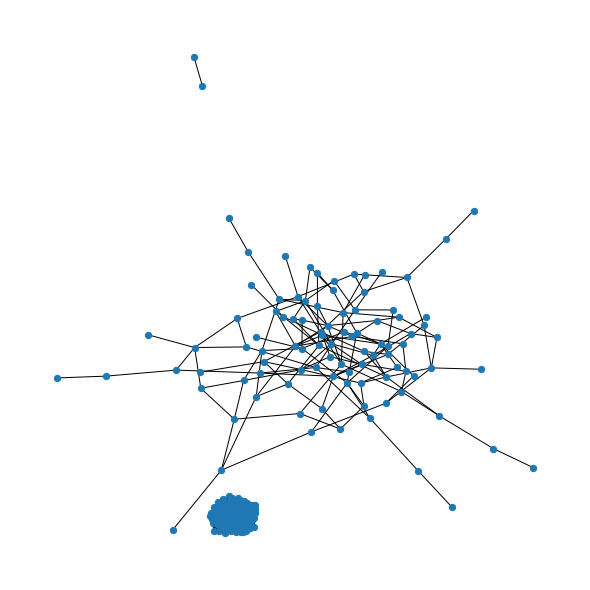

In [20]:
fig = plt.figure(figsize=(8,8))
nx.draw_spring(G2, node_size=40)

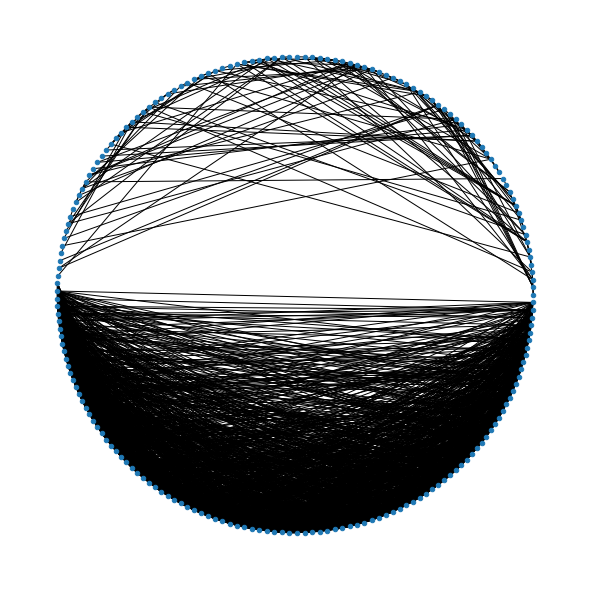

In [21]:
fig = plt.figure(figsize=(8,8))
nx.draw_circular(G2, node_size=20)

Para poder tener más detalles de la red, graficaremos cada componente por separado.

In [22]:
g = G2
nodes = []
edges = []

components = [g.subgraph(c).copy() for c in nx.connected_components(g)]
for idx,g in enumerate(components,start=1):
    nodes.append(g.nodes())
    edges.append(g.edges())

#### Primera componente

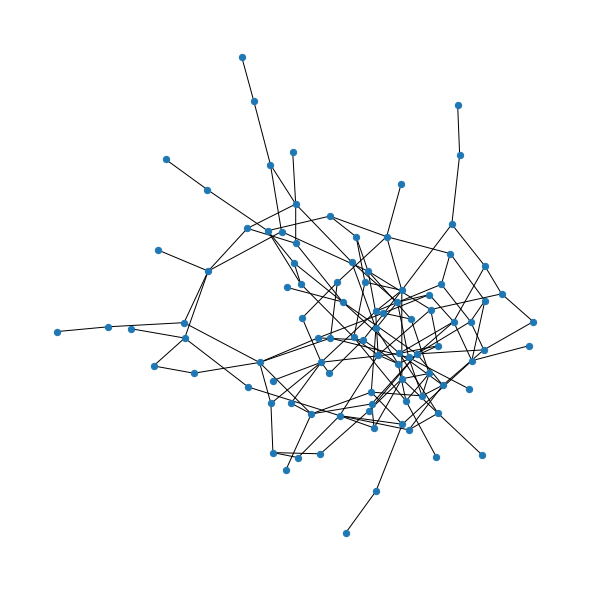

In [33]:
A = nx.Graph()
A.add_nodes_from(nodes[0])
A.add_edges_from(edges[0])
fig = plt.figure(figsize=(8,8))
nx.draw_spring(A, node_size=40)

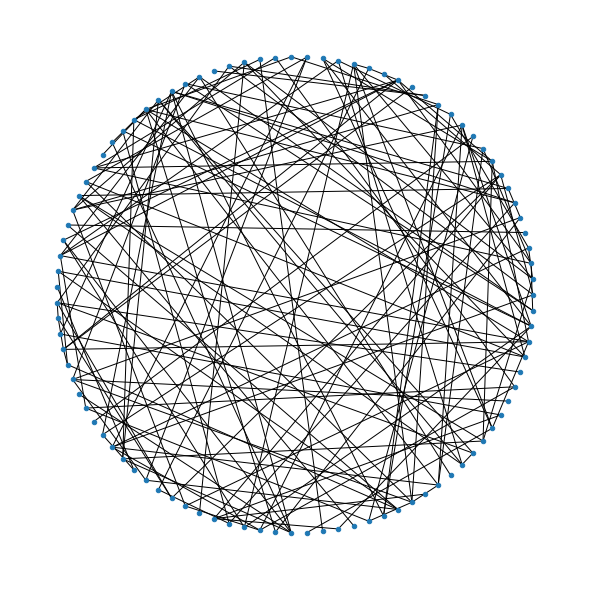

In [34]:
fig = plt.figure(figsize=(8,8))
nx.draw_circular(A, node_size=20)

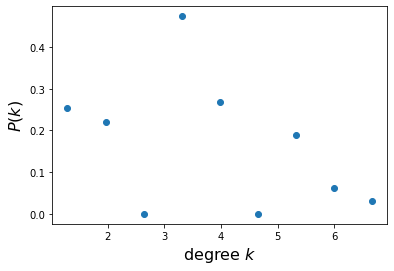

In [35]:
N = len(A)
L = A.size()
degrees = list(dict(A.degree()).values())
kmin = min(degrees)
kmax = max(degrees)

# Entrega 20 bins linealmente espaceados entre kmin y kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histograma de la data en estos bines 
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# Muestra la gráfica
plt.show()

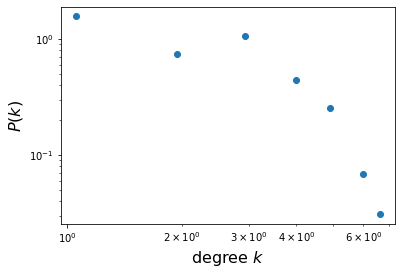

In [36]:
# Generamos 10 bins espaciados logaritmicamente entre kmin y kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)

# histograma de la data para esos bines
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
plt.show()

#### Segunda componente

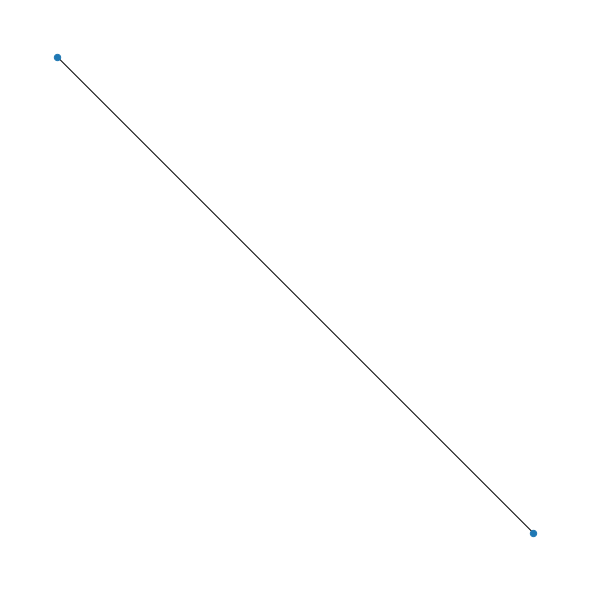

In [37]:
B = nx.Graph()
B.add_nodes_from(nodes[1])
B.add_edges_from(edges[1])
fig = plt.figure(figsize=(8,8))
nx.draw_spring(B, node_size=40)

#### Tercera componente

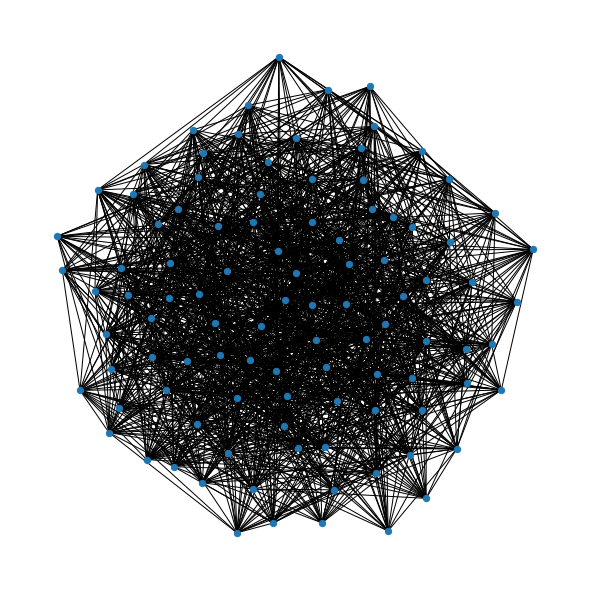

In [43]:
C = nx.Graph()
C.add_nodes_from(nodes[2])
C.add_edges_from(edges[2])
fig = plt.figure(figsize=(8,8))
nx.draw_spring(C, node_size=40)

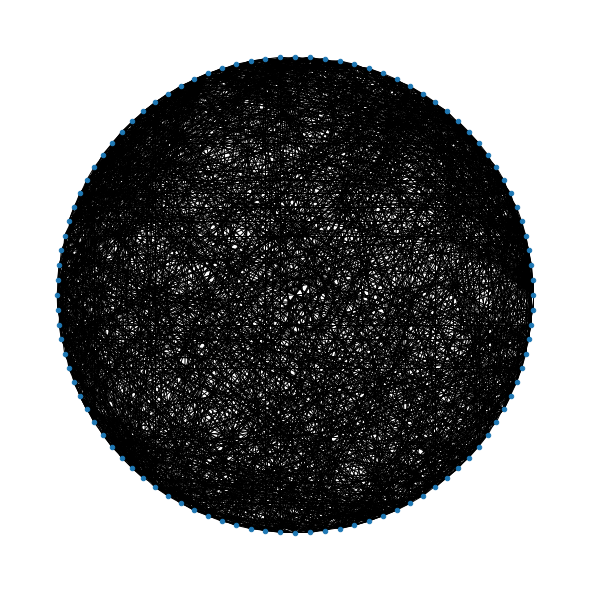

In [44]:
fig = plt.figure(figsize=(8,8))
nx.draw_circular(C, node_size=20)

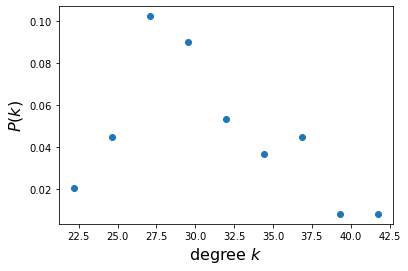

In [45]:
N = len(C)
L = C.size()
degrees = list(dict(C.degree()).values())
kmin = min(degrees)
kmax = max(degrees)

# Entrega 20 bins linealmente espaceados entre kmin y kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histograma de la data en estos bines 
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# Muestra la gráfica
plt.show()

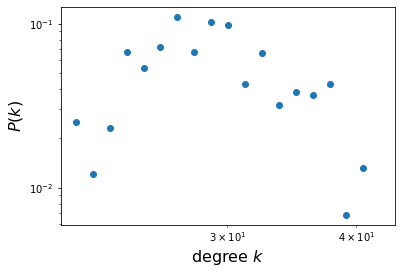

In [46]:
# Generamos 10 bins espaciados logaritmicamente entre kmin y kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)

# histograma de la data para esos bines
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
plt.show()